<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
Number of rows in the dataset:  303
Number of columns in the dataset:  14


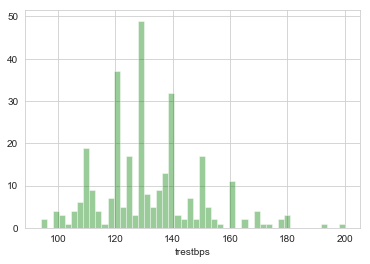

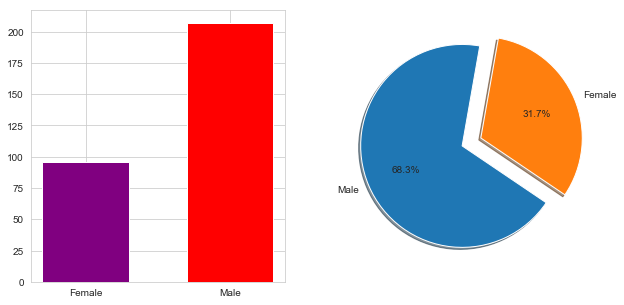

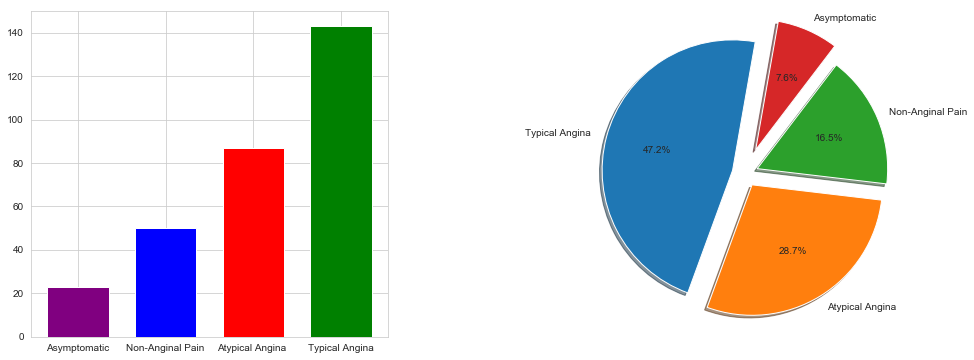

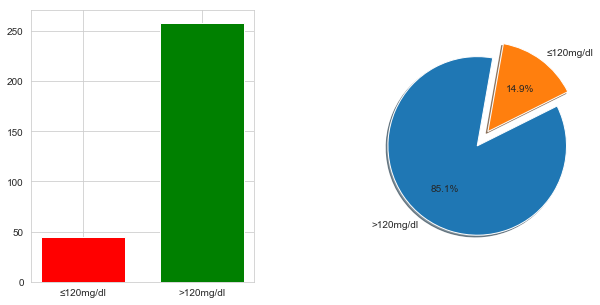

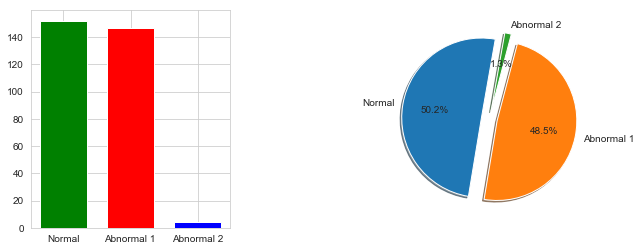

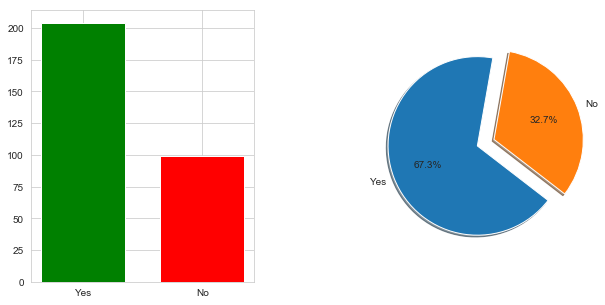

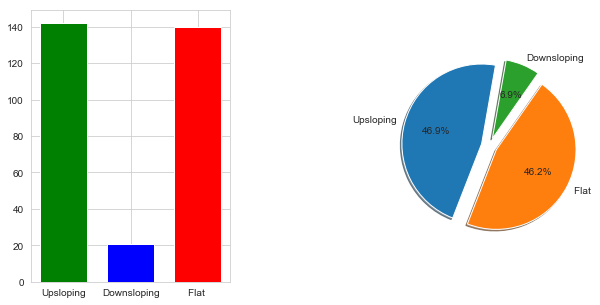

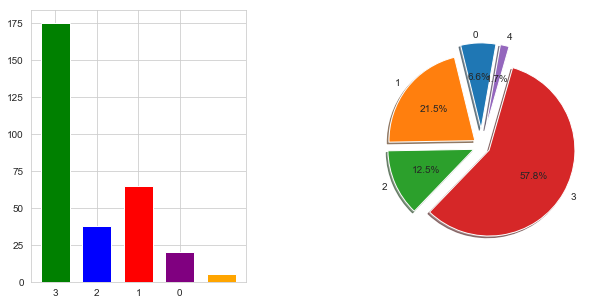

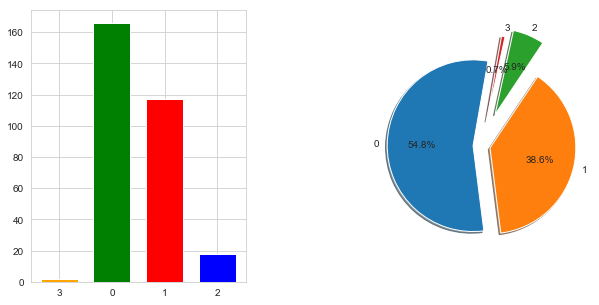

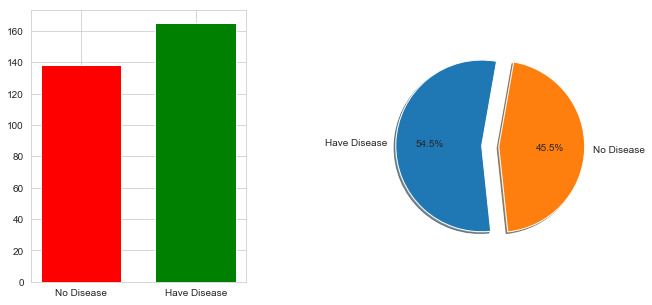

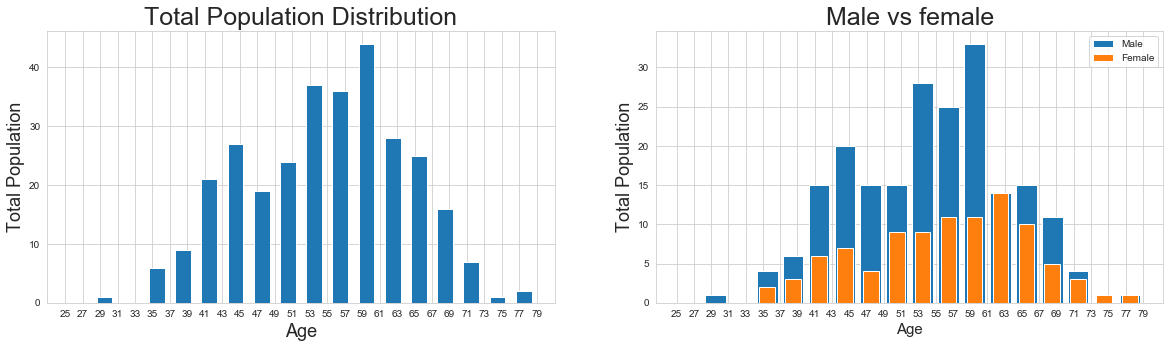

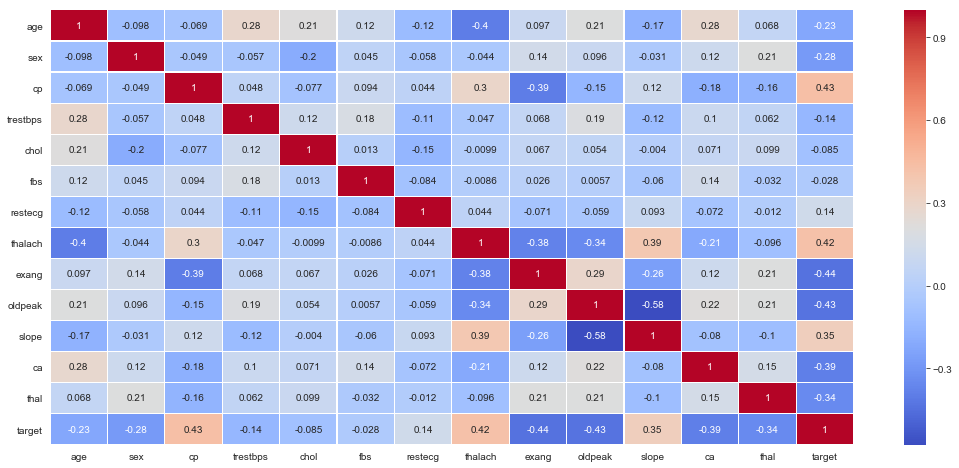

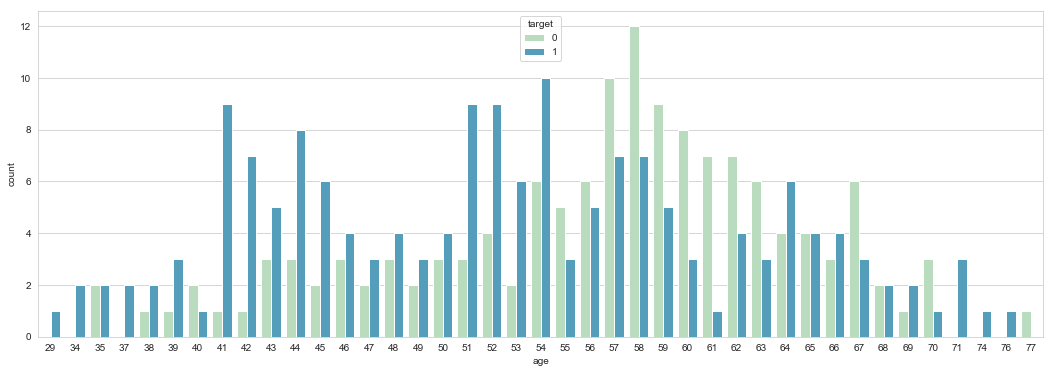

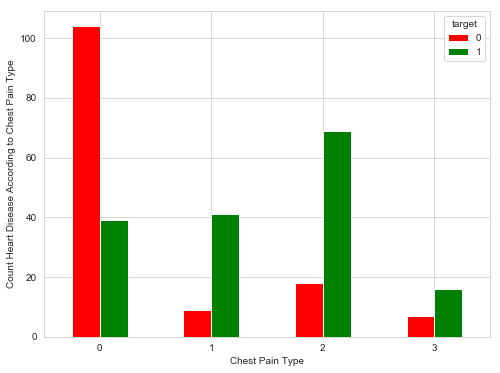

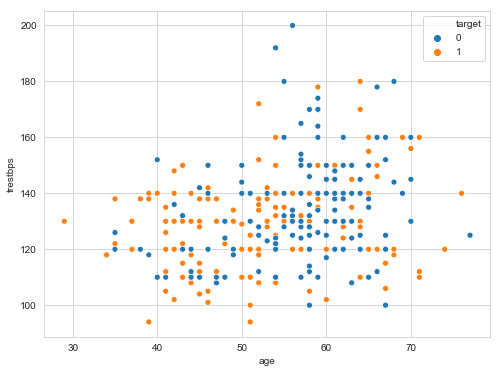

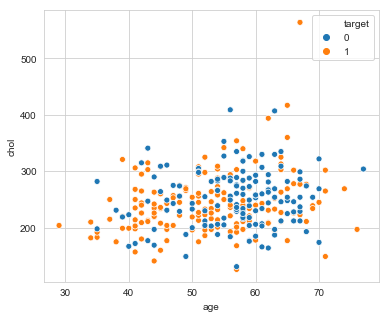

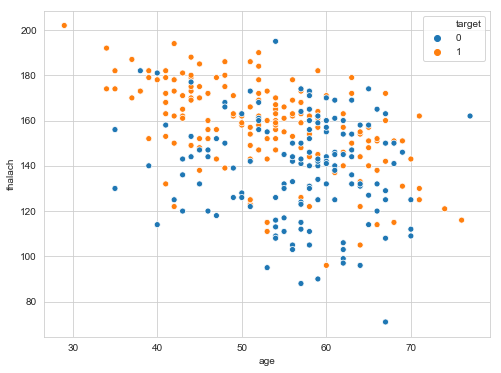

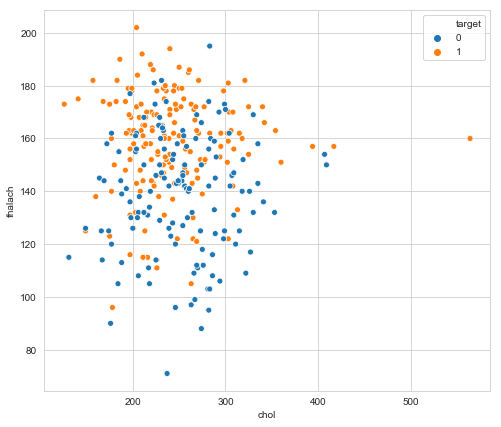

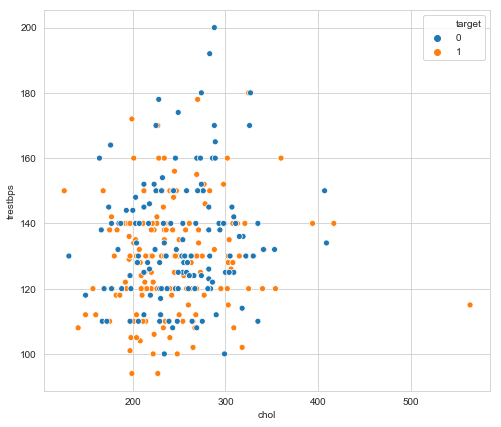

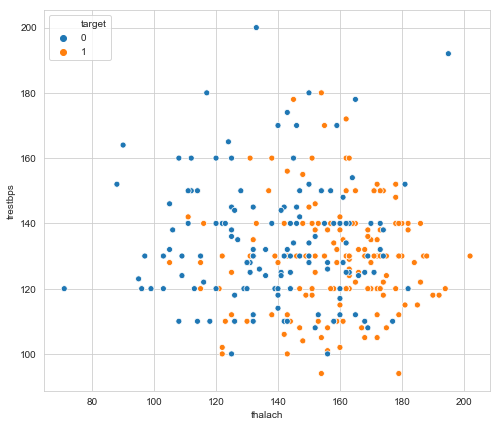

       Specs       Score
7    thalach  188.320472
13    target  138.000000
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095


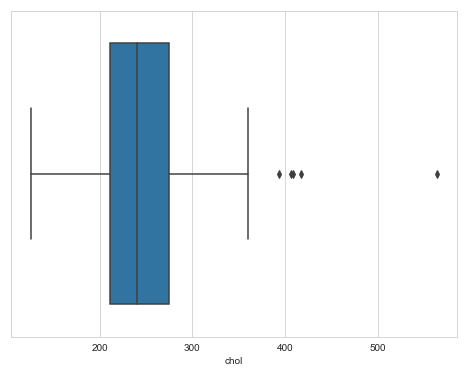

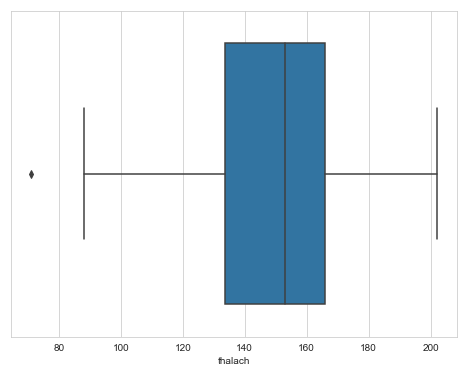

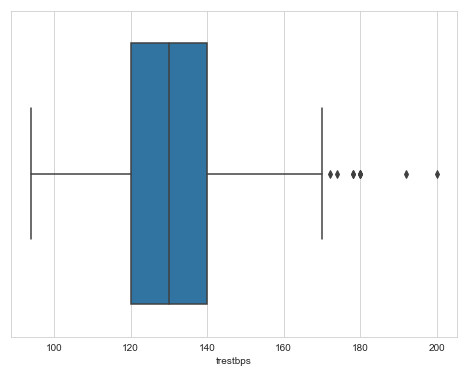

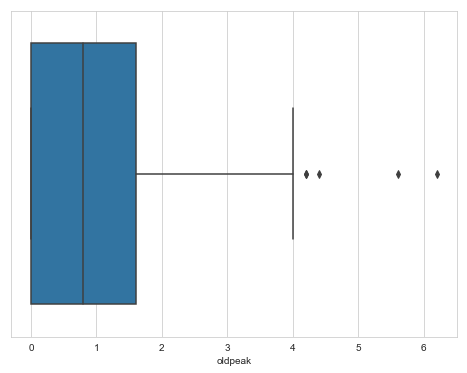

KNN Accuracy Score:  84.444 %


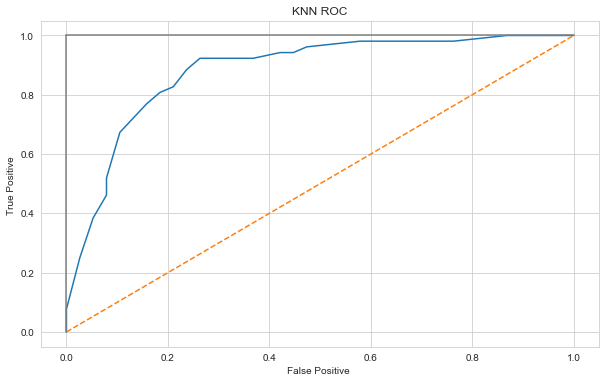

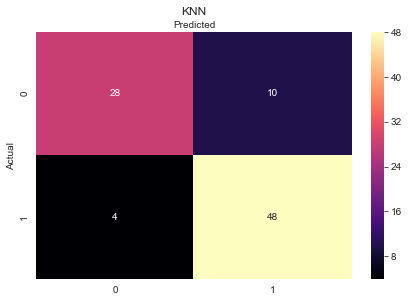

Logistic Regression Accuracy:  81.111 %


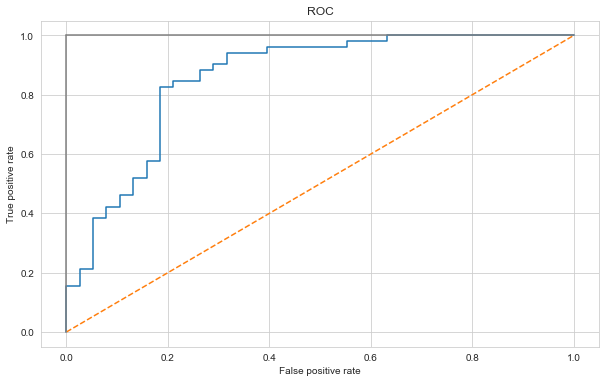

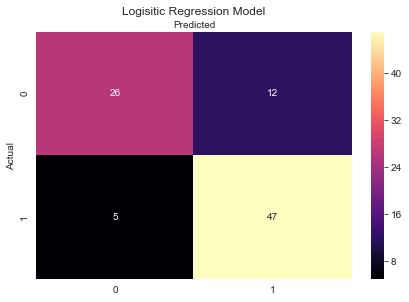

Decision Tree Accuracy Score:  73.333 %


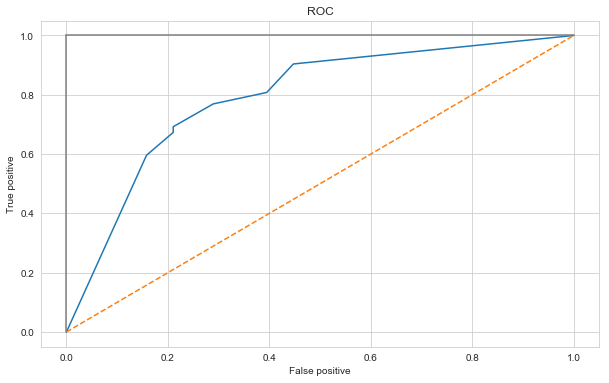

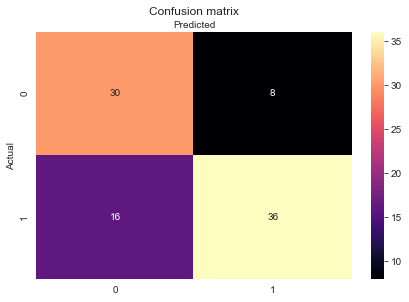

Estimator:- 5
Accuracy:-  0.7866666666666666
Cross validation score  0.7972376714868373
Estimator:- 10
Accuracy:-  0.8133333333333334
Cross validation score  0.7867779013718946
Estimator:- 50
Accuracy:-  0.8133333333333334
Cross validation score  0.8168075639599556
Estimator:- 100
Accuracy:-  0.8133333333333334
Cross validation score  0.8308231368186874
Estimator:- 500
Accuracy:-  0.8133333333333334
Cross validation score  0.8344938820912124


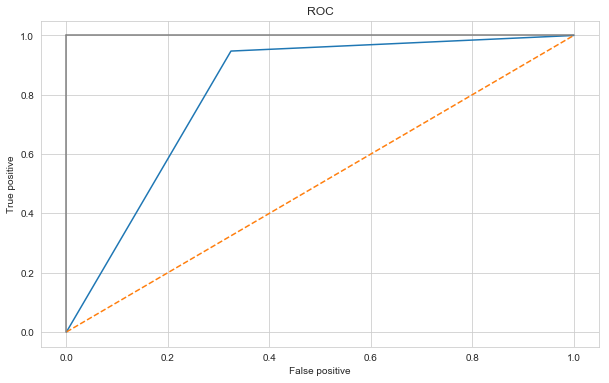

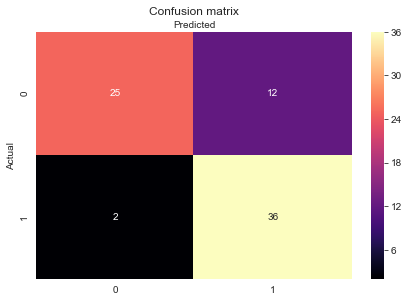

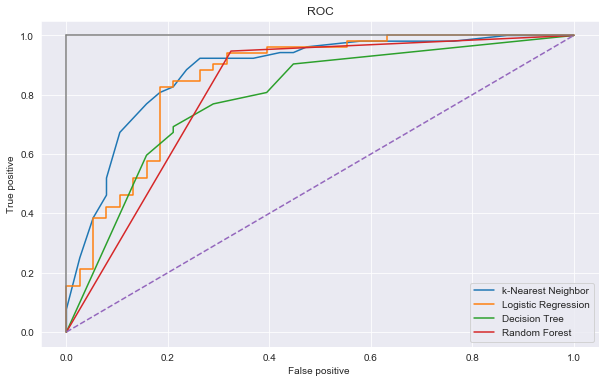

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve


d = pd.read_csv('heart.csv') 
#Data Information
d.info()

#Data Summary
d.describe()


# Dataset Dimensions
print('Number of rows in the dataset: ',d.shape[0])
print('Number of columns in the dataset: ',d.shape[1])

#The First 5 Rows Data
d.head()

# Age Attribute
import seaborn as s 
# Number of People Who Have Heart Disease According to Age
plt.figure(figsize=(18,6))
s.countplot(x='age',data = d, hue = 'target',palette='GnBu')
plt.show()


# Gender Attribute
fig, (a1,a2) = plt.subplots(1,2,figsize = (10,5),constrained_layout=False)
plt.subplots_adjust(wspace = 0.2)
a1.bar(d.sex.unique(),d.sex.value_counts(),color = ['red','purple'],width = 0.6)
a1.set_xticks(d.sex.unique())
a1.set_xticklabels(('Male','Female'))
a2.pie((207,96), labels = ('Male','Female'), autopct='%1.1f%%', shadow=True, startangle=80, explode=[0,0.2])
plt.show()

# CP Attribute
fig, (a1,a2) = plt.subplots(1,2,figsize = (16,6),constrained_layout=False)
plt.subplots_adjust(wspace = 0.5)

a1.bar(d.cp.unique(),d.cp.value_counts(),color = ['green','red','blue','purple'],width = 0.7)
a1.set_xticks(d.cp.unique())
a1.set_xticklabels(('Typical Angina','Atypical Angina ','Non-Anginal Pain','Asymptomatic'))

a2.pie((143,87,50,23), labels = ('Typical Angina ','Atypical Angina ','Non-Anginal Pain','Asymptomatic'), autopct='%1.1f%%', shadow=True, startangle=80, explode=[0.1,0.1,0.1,0.2])

plt.show()

#FBS Attribute
fig, (a1,a2) = plt.subplots(1,2,figsize = (10,5),constrained_layout=False)
plt.subplots_adjust(wspace = 0.5)

a1.bar(d.fbs.unique(),d.fbs.value_counts(),color = ['green','red'],width = 0.7)
a1.set_xticks(d.fbs.unique())
a1.set_xticklabels(('>120mg/dl','≤120mg/dl'))

a2.pie((258,45), labels = ('>120mg/dl','≤120mg/dl'), autopct='%1.1f%%', shadow=True, startangle=80, explode=[0,0.2])

plt.show()


#RESTECG Attribute
fig, (a1,a2) = plt.subplots(1,2,figsize = (10,4),constrained_layout=False)
plt.subplots_adjust(wspace = 0.8)

a1.bar(d.restecg.unique(),d.restecg.value_counts(),color = ['green','red','blue'],width = 0.7)
a1.set_xticks(d.restecg.unique())
a1.set_xticklabels(('Normal','Abnormal 1 ','Abnormal 2'))

a2.pie((152,147,4), labels = ('Normal','Abnormal 1 ','Abnormal 2'), autopct='%1.1f%%', shadow=True, startangle=80, explode=[0.1,0.1,0.1])

plt.show()

#EXANG Attribute
fig, (a1,a2) = plt.subplots(1,2,figsize = (10,5),constrained_layout=False)
plt.subplots_adjust(wspace = 0.5)

a1.bar(d.exang.unique(),d.exang.value_counts(),color = ['green','red'],width = 0.7)
a1.set_xticks(d.exang.unique())
a1.set_xticklabels(('Yes','No'))

a2.pie((204,99), labels = ('Yes','No'), autopct='%1.1f%%', shadow=True, startangle=80, explode=[0,0.2])

plt.show()


#Slope Attribute
fig, (a1,a2) = plt.subplots(1,2,figsize = (10,5),constrained_layout=False)
plt.subplots_adjust(wspace = 0.8)

a1.bar(d.slope.unique(),d.slope.value_counts(),color = ['green','red','blue'],width = 0.7)
a1.set_xticks(d.slope.unique())
a1.set_xticklabels(('Upsloping','Flat ','Downsloping'))

a2.pie((142,140,21), labels = ('Upsloping','Flat ','Downsloping'), autopct='%1.1f%%', shadow=True, startangle=80, explode=[0.1,0.1,0.1])

plt.show()


#CA Attribute
fig, (a1,a2) = plt.subplots(1,2,figsize = (10,5),constrained_layout=False)
plt.subplots_adjust(wspace = 0.6)

a1.bar(d.ca.unique(),d.ca.value_counts(),color = ['green','red','blue','purple','orange'],width = 0.7)
a1.set_xticks(d.cp.unique())
a1.set_xticklabels(('0','1','2','3','4'))

a2.pie((20,65,38,175,5), labels = ('0','1','2','3','4'), autopct='%1.1f%%', shadow=True, startangle=80, explode=[0.2,0.1,0.1,0.1,0.2])

plt.show()


#THAL Attribute
fig, (a1,a2) = plt.subplots(1,2,figsize = (10,5),constrained_layout=False)
plt.subplots_adjust(wspace = 0.6)

a1.bar(d.thal.unique(),d.thal.value_counts(),color = ['green','red','blue','orange'],width = 0.7)
a1.set_xticks(d.thal.unique())
a1.set_xticklabels(('0','1','2','3'))

a2.pie((166,117,18,2), labels = ('0','1','2','3'), autopct='%1.1f%%', shadow=True, startangle=80, explode=[0.1,0.1,0.4,0.3])

plt.show()


#Target Attribute
fig, (a1,a2) = plt.subplots(1,2,figsize = (10,5),constrained_layout=False)
plt.subplots_adjust(wspace = 0.6)

a1.bar(d.target.unique(),d.target.value_counts(),color = ['green','red'],width = 0.7)
a1.set_xticks(d.target.unique())
a1.set_xticklabels(('Have Disease','No Disease'))

a2.pie((165,138), labels = ('Have Disease','No Disease'), autopct='%1.1f%%', shadow=True, startangle=80, explode=[0,0.2])

plt.show()


# Population Distribution with Age and Sex

fig, (a1,a2) = plt.subplots(1,2, figsize = (20,5),constrained_layout=False)
bin_x = range(25,80,3)

a1.hist(d.age.tolist(),bins=bin_x,rwidth=0.6)
a1.set_xticks(range(25,80,2))
a1.set_xlabel('Age',fontsize=18)
a1.set_ylabel('Total Population',fontsize=18)
a1.set_title('Total Population Distribution',fontsize=25)

a2.hist(d[d['sex']==1].age.tolist(),label = 'Male',bins=bin_x,rwidth=0.8)
a2.hist(d[d['sex']==0].age.tolist(),label = 'Female',bins=bin_x,rwidth=0.6)
a2.legend()
a2.set_xticks(range(25,80,2))
a2.set_xlabel('Age',fontsize=15)
a2.set_ylabel('Total Population',fontsize=18)
a2.set_title('Male vs female',fontsize=25)

plt.show()


#Missing Value Testing
d.isnull().sum()


#Heat Map

import seaborn as s
plt.figure(figsize=(18,8))
s.heatmap(d.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

# Number of People Who Have Heart Disease According to Age

plt.figure(figsize=(18,6))
s.countplot(x='age',data = d, hue = 'target',palette='GnBu')
plt.show()

# Number of People Who Have Heart Disease According to Chest Pain Type
pd.crosstab(d.cp,d.target).plot(kind="bar",figsize=(8,6),color=['red','green' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Count Heart Disease According to Chest Pain Type')
plt.show()

#Scatterplot for Age vs.Trestbps

plt.figure(figsize=(8,6))
s.scatterplot(x='age',y='trestbps',data=d,hue='target')
plt.show()

#Scatterplot for Age vs.Chol

plt.figure(figsize=(6,5))
s.scatterplot(x='age',y='chol',data=d,hue='target')
plt.show()

#Scatterplot for Age vs.Thalach

plt.figure(figsize=(8,6))
s.scatterplot(x='age',y='thalach',data=d,hue='target')
plt.show()

#Scatterplot for Thalach vs.Chol 

plt.figure(figsize=(8,7))
s.scatterplot(x='chol',y='thalach',data=d,hue='target')
plt.show()

#Scatterplot for Trestbps vs.Chol

plt.figure(figsize=(8,7))
s.scatterplot(x='chol',y='trestbps',data=d,hue='target')
plt.show()

#Scatterplot for Trestbps vs.Thalach

plt.figure(figsize=(8,7))
s.scatterplot(x='thalach',y='trestbps',data=d,hue='target')
plt.show()


#Chol Outlier
f, ax = plt.subplots(figsize=(8, 6))
s.boxplot(x=d["chol"])
plt.show()

#Thalach Outlier
f, ax = plt.subplots(figsize=(8, 6))
s.boxplot(x=d["thalach"])
plt.show()

#Trestbps Outlier
f, ax = plt.subplots(figsize=(8, 6))
s.boxplot(x=d["trestbps"])
plt.show()

#Oldpeak Outlier
f, ax = plt.subplots(figsize=(8, 6))
s.boxplot(x=d["oldpeak"])
plt.show()

#Cleaning outlier
d=d[d.chol!=564]
d=d[(d['oldpeak']<=5)]
d=d[(d['trestbps']<=180)]
d=d[(d['thalach'] >= 85)]

#Splitting and Scaling dataset

from sklearn.model_selection import train_test_split
X= d.drop('target',axis=1)
y=d['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)


#K- Nearest - Neighbor

knn =KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1,33,2)]}
model = GridSearchCV(knn,params,cv=10)
model.fit(X_train,y_train)
model.best_params_  

predict = model.predict(X_test)

print('KNN Accuracy Score: ',
      round(accuracy_score(y_test,predict),5)*100,'%')
#KNN ROC

y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('KNN ROC')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.show()
roc_auc_score(y_test,y_probabilities)

#KNN Confusion Matrix

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,predict)

s.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'magma',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('KNN', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


#Logistic Regression

log = LogisticRegression()
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(log,param_grid=params,cv=10)
log_model.fit(X_train,y_train)
predict = log_model.predict(X_test)
print('Logistic Regression Accuracy: ',
      round(accuracy_score(y_test,predict),5)*100,'%')
 

#LR ROC

target_probailities_log = log_model.predict_proba(X_test)[:,1]

log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
s.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('ROC')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

#LR Confusion Matrix
 
cnf_matrix = confusion_matrix(y_test,predict)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

s.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'magma',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Logisitic Regression Model', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
    
#Decision Tree


dtree= DecisionTreeClassifier(random_state=7)

params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)
tree_model.fit(X_train,y_train)

tree_model.best_params_
predict = tree_model.predict(X_test)


print('Decision Tree Accuracy Score: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

target_probabilities_tree = tree_model.predict_proba(X_test)[:,1]
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_test,
                                                             target_probabilities_tree)
#Decision Tree ROC
s.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('ROC')
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive')
plt.xlabel('False positive')
plt.show()

cnf_matrix = confusion_matrix(y_test,predict)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
s.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'magma',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



y = d['target']
X = d.drop(['target'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)
classifier = DecisionTreeClassifier(max_depth = 3,random_state=1)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
confusion_matrix(y_test,y_pred)

cv_score = cross_val_score(classifier,X,y,cv=10)

from sklearn.
    print("Cross validation score ",cv_dec_tree_clf.mean())
ensemble import RandomForestClassifier
for est in [5,10,50,100,500]:
    classifier = RandomForestClassifier(n_estimators=est,random_state=0)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    confusion_matrix(y_test,y_pred)
    print('Estimator:-',est)
    print("Accuracy:- ",accuracy_score(y_test,y_pred))
    cv_dec_tree_clf = cross_val_score(classifier,X,y,cv=10)

forest_false_positive_rate,forest_true_positive_rate,forest_threshold = roc_curve(y_test, y_pred)


#Random Forest ROC
s.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('ROC')
plt.plot(forest_false_positive_rate,forest_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive')
plt.xlabel('False positive')
plt.show()

cnf_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
s.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'magma',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


#All ROC Compared

s.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.title('ROC')
plt.plot(false_positive_rate_knn,true_positive_rate_knn,label='k-Nearest Neighbor')
plt.plot(log_false_positive_rate,log_true_positive_rate,label='Logistic Regression')
plt.plot(tree_false_positive_rate,tree_true_positive_rate,label='Decision Tree')
plt.plot(forest_false_positive_rate,forest_true_positive_rate,label='Random Forest')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive')
plt.xlabel('False positive ')
plt.legend()
plt.show()